In [1]:
%config Completer.use_jedi = False
import warnings
warnings.filterwarnings(action='ignore')

커널 PCA  
기존 주성분 분석은 데이터 행렬 $X$의 공분산 행렬을 고유값 분해한 후에 고유 벡터를 새로운 좌표축으로 할당하는 방법이었다.  
기존의 데이터 포인트는 새로운 좌표축을 기준으로 새로운 좌표를 할당받았다. 이때 사용하는 새로운 좌표축에 해당하는 고유 벡터를 주성분이라고 불렀으며, 기존 데이터 포인트를 주성분에 직교 정사영하는 방법을 사용했다. 이에 반해 커널 PCA는 기존 PCA를 일반화한 방법으로 비선형적으로 수행하는 방법이다.

기존 데이터 행렬 $X$를 기존 행렬보다 큰 공간으로 패핑한 후 새로운 공간으로 이동한 데이터에 대해서 주성분 분석을 실행한다. 그리고 데이터를 다시 원래 공간으로 매핑시키면 곡선 형태를 띤 주성분 축을 확인할 수 있다.

다른 차원 축소 방법과 비교하기 위해 와인 데이터를 이용한다.

In [2]:
# 데이터 불러오기
from sklearn import datasets # 와인 데이터를 사용하기 위해 import 한다.
raw_wine = datasets.load_wine() # 와인 데이터를 불러온다.

In [3]:
# 피쳐/타겟 데이터 지정
X = raw_wine.data # 와인 피쳐 데이터를 저장한다.
y = raw_wine.target # 와인 타겟 데이터를 저장한다.

In [4]:
# 트레이닝/테스트 데이터 분할
from sklearn.model_selection import train_test_split # 트레이닝/테스트 데이터 분할을 위해 import 한다.
X_tn, X_te, y_tn, y_te = train_test_split(X, y, random_state=1) # 트레이닝 데이터와 테스트 데이터로 분할한다.
print(X_tn.shape, X_te.shape)

(133, 13) (45, 13)


In [5]:
# 데이터 표준화
from sklearn.preprocessing import StandardScaler # 데이터 표준화를 위해 import 한다.
std_scale = StandardScaler() # 표준화 스케일러 객체를 만든다.
# 표준화는 트레이닝 데이터를 기반으로 실행하므로 트레이닝 피쳐 데이터 X_tn을 표준화 스케일러에 적합시킨다.
std_scale.fit(X_tn)
X_tn_std = std_scale.transform(X_tn) # 트레이닝 피쳐 데이터 X_tn을 표준화 한다.
X_te_std = std_scale.transform(X_te) # 테스트 피쳐 데이터 X_te를 표준화 한다.

In [12]:
# 커널 PCA를 통한 데이터 차원 축소
from sklearn.decomposition import KernelPCA # 커널 PCA 알고리즘을 사용하기 위해 import 한다.
# n_components 옵션을 사용해서 줄이고 싶은 차원수를 설정한다.
# 커널 PCA의 형태는 kernel 옵션으로 지정하며 linear, poly, rbf, sigmoid, cosine, precomputed 등이 있다.
k_pca = KernelPCA(n_components=2, kernel='poly') # 커널 PCA 객체를 만든다.
k_pca.fit(X_tn_std) # 표준화된 피쳐 데이터 X_tn_std를 커널 PCA 객체에 적합시킨다.
X_tn_kpca = k_pca.transform(X_tn_std) # 적합된 커널 PCA 모형을 바탕으로 표준화된 트레이닝 데이터의 차원을 축소한다.
X_te_kpca = k_pca.transform(X_te_std) # 적합된 커널 PCA 모형을 바탕으로 표준화된 테스트 데이터의 차원을 축소한다.

In [13]:
# 데이터 차원 축소 확인
# 차원 축소 이전 데이터의 차원을 확인하면, 오리지널 피쳐 데이터는 13차원의 데이터 133개로 구성되어 있음을 확인할
# 수 있고 주성분 분석을 이용해 차원 축소한 데이터는 2차원 데이터 133개로 구성되어 있음을 확인할 수 있다.
print(X_tn_std.shape, X_tn_kpca.shape)

(133, 13) (133, 2)


In [15]:
# 고유값, 고유 벡터 확인
# 주어진 데이터를 2차원으로 줄였으므로 2개의 고유값을 확인할 수 있다.
print(k_pca.lambdas_) # lambdas_ 속성으로 계산된 고유값을 얻어올 수 있다.
# 고유 벡터는 각 고유값에 대응되는 벡터로, 이 고유 벡터가 바로 주성분 벡터이다.
print(k_pca.alphas_) # alphas_ 속성으로 계산된 고유 벡터를 얻어올 수 있다.

[193.89824561 118.0368972 ]
[[ 0.07266242  0.00456251]
 [ 0.0469712  -0.04020348]
 [ 0.08698324  0.07012786]
 [ 0.19996777  0.218482  ]
 [ 0.14558241  0.12759024]
 [-0.0316937  -0.0955557 ]
 [-0.10921606  0.09183472]
 [-0.11306065  0.07491762]
 [ 0.08725253  0.05204947]
 [-0.02421116 -0.09637237]
 [ 0.10518354  0.00629214]
 [ 0.08056162  0.03107663]
 [ 0.03371273 -0.12190244]
 [-0.10603515  0.03252174]
 [ 0.07314539 -0.07636543]
 [-0.00830065 -0.06671645]
 [ 0.08166126  0.0683314 ]
 [-0.12106496  0.08116178]
 [-0.00440492 -0.13286099]
 [-0.098436    0.01206587]
 [ 0.16936111  0.14411655]
 [-0.00112801 -0.10236899]
 [ 0.05046673  0.05090575]
 [ 0.02312764 -0.11672988]
 [ 0.05288299  0.01634404]
 [-0.14390684  0.07755703]
 [-0.1116687   0.10213843]
 [-0.09004075  0.07111502]
 [-0.13169412  0.12006775]
 [-0.06341878 -0.03931811]
 [-0.01177083 -0.10981527]
 [ 0.03619517 -0.01828061]
 [-0.156624    0.11828334]
 [ 0.09838309  0.05224656]
 [-0.03607944 -0.04304917]
 [-0.08718829  0.03003902]


In [16]:
# 차원 축소된 데이터를 데이터프레임 형태로 변환한다.
import pandas as pd # 데이터프레임 형태로 만들기 위해서 판다스 라이브러리를 import 한다.
kpca_columns = ['kpca_comp1', 'kpca_comp2'] # 차원 축소된 데이터의 열 이름을 정한다.
X_tn_kpca_df = pd.DataFrame(X_tn_kpca, columns=kpca_columns) # 차원 축소된 데이터를 데이터프레임으로 만든다.
X_tn_kpca_df['target'] = y_tn # 차원 축소된 데이터로 만든 데이터프레임에 타겟 데이터를 결합한다.
X_tn_kpca_df

,kpca_comp1,kpca_comp2,target
0,1.011805,0.049569,0
1,0.654061,-0.436790,1
2,1.211219,0.761903,0
3,2.784498,2.373693,0
4,2.027196,1.386201,0
...,...,...,...
128,-0.935327,0.094699,2
129,-2.091781,0.684901,2
130,-0.177160,-0.674989,1
131,-1.179702,0.125194,2


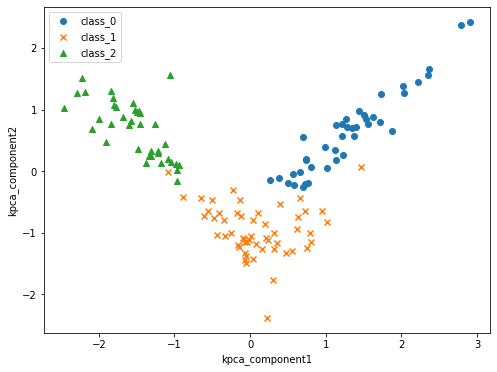

In [18]:
# 커널 PCA 적용 데이터 시각화
import matplotlib.pyplot as plt
df = X_tn_kpca_df
markers = ['o', 'x', '^'] # 시각화에 사용할 마커를 지정한다.
plt.figure(figsize=[8, 6])

# enumerate() 함수는 (인덱스, 데이터) 형태의 튜플을 리턴한다.
for index, marker in enumerate(markers):
    df_index = df[df['target'] == index] # 시각화할 와인 데이터를 얻어온다.
    target_index = raw_wine.target_names[index] # 시각화할 와인의 타겟 이름을 얻어온다.
    X1 = df_index['kpca_comp1'] # 시각화할 차원 축소된 데이터의 첫 번째 주성분 벡터를 얻어온다.
    X2 = df_index['kpca_comp2'] # 시각화할 차원 축소된 데이터의 두 번째 주성분 벡터를 얻어온다.
    plt.scatter(X1, X2, marker=marker, label=target_index) # 산포도를 그린다.
# =====

plt.xlabel('kpca_component1')
plt.ylabel('kpca_component2')
plt.legend()
plt.show()

In [21]:
# 데이터 학습 및 예측
from sklearn.ensemble import RandomForestClassifier # 랜덤 포레스트 알고리즘을 사용하기 위해 import 한다.
clf_rf_kpca = RandomForestClassifier(max_depth=2, random_state=0) # 랜덤 포레스트 모델 객체를 만든다.
# 표준화된 피쳐 데이터 X_tn_std와 트레이닝 타겟 데이터 y_tn을 넣어서 랜덤 포레스트 알고리즘을 학습시킨다.
clf_rf_kpca.fit(X_tn_kpca, y_tn)
pred_rf_kpca = clf_rf_kpca.predict(X_te_kpca) # 표준화된 테스트 데이터 X_te_std로 예측한다.
print(pred_rf_kpca)

[2 1 0 1 0 2 1 0 2 1 0 0 1 0 1 1 2 0 1 0 0 1 0 0 0 2 0 0 0 2 1 2 2 0 1 1 1
 1 1 0 0 1 2 0 0]


In [23]:
# 정확도 평가
from sklearn.metrics import accuracy_score # 모형 정확도를 평가하기 위해 import 한다.
# accuracy_score() 함수의 인수로 실제 타겟 데이터와 예측된 데이터를 넘겨 정확도를 평가한다.
accuracy = accuracy_score(y_te, pred_rf_kpca)
print(accuracy)

0.9555555555555556


모델 정확도는 95.5%로 확인된다.  
차원 축소를 하지 않았을 때 데이터를 통한 학습 정확도는 97.7%이었고 PCA를 적용했을 때 95.5%로 나타났고, 커널 PCA도 PCA와 마찬가지로 95.5%로 나타남을 알 수 있다.